# Examining Gun Violence

In [2]:
from IPython.display import display
from time import time
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import file

In [3]:
filename = 'gun-violence-data_01-2013_03-2018.csv'
df_raw = pd.read_csv(filename)
print(df_raw.shape)

(239677, 29)


## Cleaning and formatting

In [4]:
t0 = time()

df = df_raw.copy()

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

df_desc = df.loc[:, ['incident_characteristics', 'notes', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type']].copy()

df_desc = df_desc.apply(lambda x: x.str.lower().str.replace(r':', ' ').str.replace(r'[^a-zA-Z ]+', ' ').fillna(''))

df_char = df_desc.loc[:, ['incident_characteristics', 'notes']].copy()

df_part = df_desc.loc[:, ['participant_age_group', 'participant_gender', 'participant_status', 'participant_type']]

df = df.loc[:, ['date', 'year', 'month', 'state', 'city_or_county', 'n_killed', 'n_injured']]

print("Time: {:.2f} seconds".format(time() - t0))

Time: 10.23 seconds


In [5]:
df_raw.loc[0, ['participant_age_group', 'participant_gender', 'participant_status', 'participant_type']]

participant_age_group    0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...
participant_gender                    0::Male||1::Male||3::Male||4::Female
participant_status       0::Arrested||1::Injured||2::Injured||3::Injure...
participant_type         0::Victim||1::Victim||2::Victim||3::Victim||4:...
Name: 0, dtype: object

(array([   7.,   11.,    9.,   14.,    6.,   12.,   18.,   18.,   14.,
          26.,   20.,   21.,    8.,   25.,   13.,   14.,   12.,   13.,
          14., 2607., 2677., 1981., 2077., 2408., 2456., 2455., 2954.,
        2751., 3019., 3235., 3277., 3186., 3196., 3232., 2960., 2493.,
        2189., 2467., 2363., 2312., 2224., 2471., 2825., 2778., 2941.,
        3138., 3076., 2980., 3116., 3171., 2993., 3107., 2774., 3018.,
        2730., 2636., 2752., 2845., 2706., 2622., 2984., 3003., 2941.,
        3016., 2998., 2758., 3305., 3159., 3393., 3340., 3217., 2969.,
        3287., 3406., 3231., 3058., 3398., 3107., 3179., 2858., 3401.,
        3578., 3405., 3500., 3291., 3459., 3519., 3284., 3106., 2949.,
        3197., 3161., 3073., 3168., 2883., 2835., 3070., 2730., 2879.,
        3109.]),
 array([734869.  , 734888.15, 734907.3 , 734926.45, 734945.6 , 734964.75,
        734983.9 , 735003.05, 735022.2 , 735041.35, 735060.5 , 735079.65,
        735098.8 , 735117.95, 735137.1 , 735156.25, 73

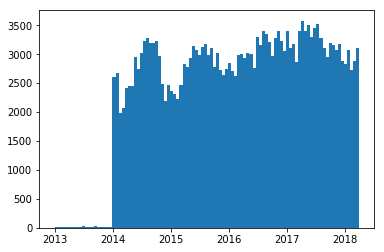

In [6]:
plt.hist(df['date'], bins=100)

## Bags of Words

In [12]:
t0 = time()

from sklearn.feature_extraction.text import CountVectorizer

for col in list(df_char.columns):
    vectorizer = CountVectorizer(max_features=100, stop_words='english')
    x = vectorizer.fit_transform(df_char[col])
    bag_of_words = pd.DataFrame(x.toarray(), columns=(col + '.' + s for s in vectorizer.get_feature_names()))
    df = df.join(bag_of_words)

print("Time: {:.2f} seconds".format(time() - t0))

Time: 16.50 seconds


In [13]:
list(df.columns)

['date',
 'year',
 'month',
 'state',
 'city_or_county',
 'n_killed',
 'n_injured',
 'incident_characteristics.abductions',
 'incident_characteristics.accidental',
 'incident_characteristics.action',
 'incident_characteristics.aggression',
 'incident_characteristics.alcohol',
 'incident_characteristics.applies',
 'incident_characteristics.armed',
 'incident_characteristics.arrest',
 'incident_characteristics.atf',
 'incident_characteristics.attempt',
 'incident_characteristics.bar',
 'incident_characteristics.brandishing',
 'incident_characteristics.business',
 'incident_characteristics.car',
 'incident_characteristics.carry',
 'incident_characteristics.child',
 'incident_characteristics.club',
 'incident_characteristics.commission',
 'incident_characteristics.confiscation',
 'incident_characteristics.crime',
 'incident_characteristics.crimes',
 'incident_characteristics.dead',
 'incident_characteristics.death',
 'incident_characteristics.defensive',
 'incident_characteristics.dgu',
 '

## Feature engineering

In [20]:
df['killed'] = np.where(df['n_killed'] > 0, 1, 0)

df['arrest'] = np.where((df['incident_characteristics.arrest'] > 0) | (df['notes.arrest'] > 0) | (df['notes.arrested'] > 0) | (df['participant_status.arrested'] > 0), 1, 0)

df['child'] = np.where(df['participant_age_group.child'] > 0, 1, 0)

print(df['killed'].value_counts())
print(df['arrest'].value_counts())
print(df['child'].value_counts())

0    185835
1     53842
Name: killed, dtype: int64
0    162415
1     77262
Name: arrest, dtype: int64
0    235971
1      3706
Name: child, dtype: int64


## Exploratory Data Analysis

In [18]:
df.loc[df['participant_age_group.child'] > 0]

,date,year,month,state,city_or_county,n_killed,n_injured,incident_characteristics.abductions,incident_characteristics.accidental,incident_characteristics.action,incident_characteristics.aggression,incident_characteristics.alcohol,incident_characteristics.applies,incident_characteristics.armed,incident_characteristics.arrest,incident_characteristics.atf,incident_characteristics.attempt,incident_characteristics.bar,incident_characteristics.brandishing,incident_characteristics.business,incident_characteristics.car,incident_characteristics.carry,incident_characteristics.child,incident_characteristics.club,incident_characteristics.commission,incident_characteristics.confiscation,incident_characteristics.crime,incident_characteristics.crimes,incident_characteristics.dead,incident_characteristics.death,incident_characteristics.defensive,incident_characteristics.dgu,incident_characteristics.diagram,incident_characteristics.discharge,incident_characteristics.domestic,incident_characteristics.drive,incident_characteristics.drug,incident_characteristics.drugs,incident_characteristics.establishment,incident_characteristics.evidence,incident_characteristics.felon,incident_characteristics.fired,incident_characteristics.flourishing,incident_characteristics.gang,incident_characteristics.group,incident_characteristics.gun,incident_characteristics.home,incident_characteristics.hostage,incident_characteristics.illegally,incident_characteristics.incident,...,notes.suspect,notes.suspects,notes.teen,notes.threat,notes.times,notes.traffic,notes.unclear,notes.vehicle,notes.vic,notes.victim,notes.wife,notes.woman,notes.wounded,participant_age_group.adult,participant_age_group.child,participant_age_group.teen,participant_gender.female,participant_gender.male,participant_relationship.aquaintance,participant_relationship.armed,participant_relationship.current,participant_relationship.does,participant_relationship.drive,participant_relationship.family,participant_relationship.friends,participant_relationship.gang,participant_relationship.home,participant_relationship.invasion,participant_relationship.know,participant_relationship.knows,participant_relationship.mass,participant_relationship.neighbor,participant_relationship.perp,participant_relationship.random,participant_relationship.robbery,participant_relationship.shooting,participant_relationship.significant,participant_relationship.victim,participant_relationship.victims,participant_relationship.vs,participant_relationship.worker,participant_status.arrested,participant_status.injured,participant_status.killed,participant_status.unharmed,participant_type.subject,participant_type.suspect,participant_type.victim,killed,arrest
6,2013-01-19,2013,1,New Mexico,Albuquerque,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,1,1,1,5,1,1
56,2013-04-22,2013,4,Louisiana,Harvey,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,3,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,5,5,5,5,0,1
57,2013-04-24,2013,4,Illinois,Manchester,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6,0,1,1,6,1,0
64,2013-05-02,2013,5,New Jersey,Newark,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,5,1,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,1,5,0,0
73,2013-05-12,2013,5,Louisiana,New Orleans,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,18,2,1,8,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,19,0,3,3,3,19,0,1
122,2013-07-01,2013,7,Texas,Fort Worth,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# summation = pd.DataFrame()
# summation['null_count'] = df.apply(lambda d: d.isnull().sum())
# summation['unique'] = df.apply(lambda d: d.nunique())

In [ ]:
# display(summation.sort_values('unique', ascending=False).head(10))

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(x='year', data=df)
plt.subplot(132)
sns.countplot(x='month', data=df)
plt.subplot(133)
sns.countplot(x='state', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df.groupby('date').sum().index, df.groupby('date').sum()['arrest'])
plt.subplot(122)
plt.scatter(df.groupby('date').sum().index, df.groupby('date').sum()['killed'])
plt.show()

## Sample Split

In [ ]:
t0 = time()

# Predicting whether someone was killed
# Y = df['killed']
# X = df.drop(['date', 'state', 'city_or_county', 'n_killed', 'killed', 
#              'participant_status.killed', 'incident_characteristics.dead', 'incident_characteristics.suicide', 
#             'incident_characteristics.murder', 'notes.killed', 'incident_characteristics.killed'], axis=1)

# Predicting whether an arrest was made
Y = df['arrest']
X = df.drop(['date', 'state', 'city_or_county', 'arrest', 'incident_characteristics.arrest', 'notes.arrest', 
             'notes.arrested', 'participant_status.arrested'], axis=1)

######################################################################################################################

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

print('Number of features: {}'.format(X_train.shape[1]))
print('Training set size: {}\nTest set size: {}'.format(X_train.shape[0], X_test.shape[0]))
print('Y occurrence in training set: {:.1%}'.format(Y_train.sum() / len(Y_train)))
print('Y occurrence in test set: {:.1%}'.format(Y_test.sum() / len(Y_test)))

print("Time: {:.2f} seconds".format(time() - t0))

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

mod_type = 'r'

if mod_type == 'r':
    model = RandomForestClassifier(n_estimators=50, 
                                   min_samples_split=10, 
                                   max_features='auto', 
                                   class_weight=None)

if mod_type == 'l':
    model = LogisticRegression(penalty='l2', 
                              C=10.0, 
                              class_weight=None, 
                              fit_intercept=True)

if mod_type == 'g':
    model = GradientBoostingClassifier(n_estimators=50, 
                                      max_depth=5, 
                                      min_samples_split=10, 
                                      max_features=None)


In [ ]:
t0 = time()

model.fit(X_train, Y_train)

print("Fit time: {:.2f} seconds".format(time() - t0))

cv = cross_val_score(model, X_train, Y_train, cv=3)

print("Total time: {:.2f} seconds".format(time() - t0))

In [ ]:
from sklearn.metrics import confusion_matrix

score_train = model.score(X_train, Y_train)
score_test = model.score(X_test, Y_test)
Y_pred = model.predict(X_test)

index = ['Actual False', 'Actual True']
columns = ['Predict False', 'Predict True']
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=index, columns=columns)

if (isinstance(model, RandomForestClassifier) == True) or (isinstance(model, GradientBoostingClassifier) == True):
    feature_importances = pd.DataFrame(model.feature_importances_.round(2), X.columns, columns=["Importances"])

plusminus = u"\u00B1"

print('\nScore on training set: {:.3%}'.format(score_train))
print('\nScore on test set: {:.3%}'.format(score_test))

print('\nTest prediction results:')
display(cm)

print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv.mean(), plusminus, cv.std()*2, cv))

if (isinstance(model, RandomForestClassifier) == True) or (isinstance(model, GradientBoostingClassifier) == True):
    display(feature_importances.sort_values('Importances', ascending=False))


Logistic Regression

Score on training set: 85.666%

Score on test set: 85.493%

Test prediction results:

| | Predict False | Predict True |
| --- | --- | --- |
| **Actual False** | 15060 | 1154 |
| **Actual True** | 2323 | 5431 |

Cross validation results: 85.563% ± 0.321% 
 
 [0.85342957 0.85721041 0.85624878]

Random Forest

Score on training set: 94.870%

Score on test set: 88.435%

Test prediction results:

| | Predict False | Predict True |
| --- | --- | --- |
| **Actual False** | 74614 | 6531 |
| **Actual True** | 7328 | 31366 |

Cross validation results: 88.298% ± 0.304% 
 
 [0.8826666  0.88128974 0.88496971]